In [1]:
# Practical 5: K-Means Clustering by <Atharva Mohite (32)>
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("Libraries imported!")


Libraries imported!


In [2]:
# Load sales data
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Calculate Recency, Frequency, and Monetary for each customer
rfm = df.groupby('CUSTOMERNAME').agg({
    'ORDERDATE': lambda x: (df['ORDERDATE'].max() - x.max()).days,
    'ORDERNUMBER': 'count',
    'SALES': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
print("RFM features ready! Sample:")
print(rfm.head())


RFM features ready! Sample:
                         Recency  Frequency   Monetary
CUSTOMERNAME                                          
AV Stores, Co.               195         51  157807.81
Alpha Cognac                  64         20   70488.44
Amica Models & Co.           264         26   94117.26
Anna's Decorations, Ltd       83         46  153996.13
Atelier graphique            187          7   24179.96


In [3]:
# Standardize the RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
print("Data scaled for K-Means.")


Data scaled for K-Means.


In [4]:
# Calculate SSE for different cluster counts
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Find the point of maximum curvature (elbow)
diff = [sse[i-1] - sse[i] for i in range(1, len(sse))]
best_k = diff.index(max(diff)) + 1


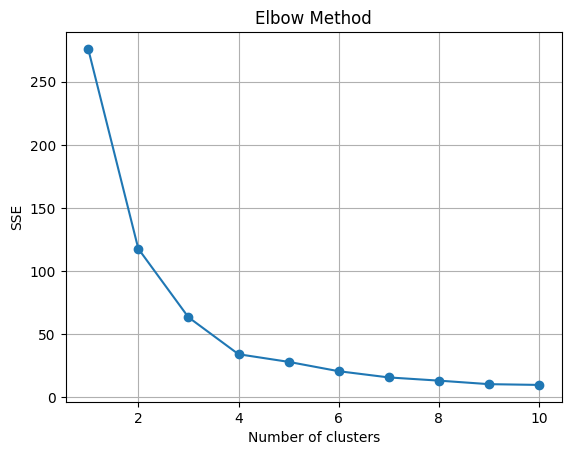

Optimal number of clusters (Elbow Method): 1


In [5]:
plt.plot(range(1,11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

print("Optimal number of clusters (Elbow Method):", best_k)
